# Problem

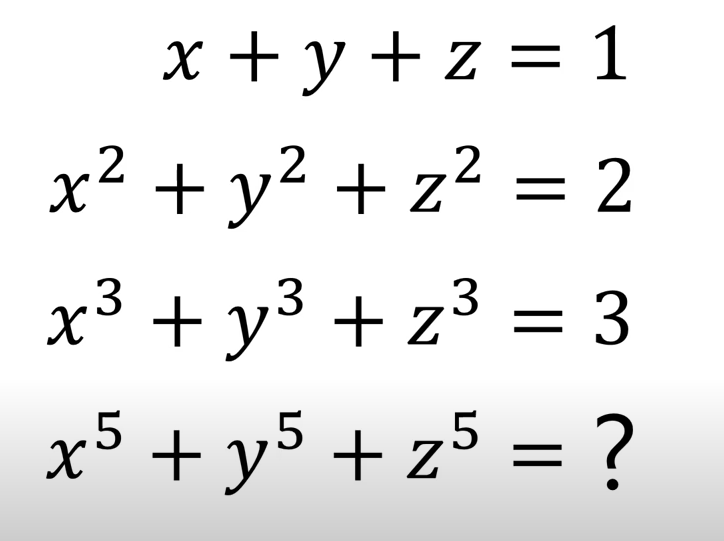

In [1]:
from sympy import init_printing, symbols, Sum, symarray, expand, simplify, factor
from sympy.solvers import solve
from sympy.polys.specialpolys import symmetric_poly
from fractions import Fraction as frac
from IPython.display import display
init_printing()

In [2]:
N = 3 # elements
K = 11 # powers
xs = symarray('x', N)
xs = symbols('x_0:{}'.format(N))

In [3]:
def s(k):
    return (sum(xs))**k

In [4]:
# what's s
nothing = [display(s(k)) for k in range(K)]

In [5]:
# power sum of symmetric polynomials
def p(k):
    return sum([x**k for x in xs])

In [6]:
# what's p
nothing = [display(p(n)) for n in range(K)]

In [7]:
# k-th degree elementary symmetric polynomials
def e(k):
    if k <= N and k >= 0:
        return symmetric_poly(k, xs)
    else:
        return 0

In [8]:
# what's e; e(k>N) == 0
nothing = [display(e(k)) for k in range(N+1)]

In [9]:
# what's the meaning of e(n)
t = symbols('t')
f = sum([t**(N-i)*e(i)*(-1)**i for i in range(N+1)])
display(f)
display(factor(f))

In [10]:
# replacing t with x0, x1, ... and sum them up, consolidated with p and e
ft = sum([p(N-i)*e(i)*(-1)**i for i in range(N)]) + N*e(N)*(-1)**N
display(ft)
display(simplify(ft))

# Newton identity

$$  \begin{align} ke_k &= \sum_{i=1}^{k}(-1)^{i-1}e_{k-i}p_{i} \end{align} \tag{1} $$
$$ n>=k>=1 $$



In [11]:
# solver only for N=3

P = [0]*1000
E = [0]*1000
P[1] = 1
P[2] = 2
P[3] = 3
E[0] = 1
E[1] = 1
E[2] = frac((E[1]*P[1] - E[0]*P[2])/2).limit_denominator()
E[3] = frac((E[2]*P[1] - E[1]*P[2] + E[0]*P[3])/3).limit_denominator()

K = 11

for k in range(4, K):
    P[k] = frac(E[3]*P[k-3] - E[2]*P[k-2] + E[1]*P[k-1]).limit_denominator()
    
print("{0:>3} {1:>40} {2:>5}".format("i", "P[i]", "E[i]"))
print("{0:>3} {1:>40} {2:>5}".format("-"*3, "-"*40, "-"*5))
nothing = [print("{0:03} {1:>40} {2:>5}".format(i, str(P[i]), str(E[i]))) for i in range(K)]



  i                                     P[i]  E[i]
--- ---------------------------------------- -----
000                                        0     1
001                                        1     1
002                                        2  -1/2
003                                        3   1/6
004                                     25/6     0
005                                        6     0
006                                   103/12     0
007                                   221/18     0
008                                  1265/72     0
009                                   905/36     0
010                                15539/432     0


### Traditional way to find e2, e3 and calculate p(n) 
### For N=3

In [12]:
# How to calculate e(2)
# e(2) = (s(2) - p(2))/2 = -1/2
display(e(2))
display(expand(s(2) - p(2))/2)

In [13]:
# How to calculate e(3)
# e(3) = 1/6
display(e(3))
display(expand(e(2)*p(1) - e(1)*p(2) + e(0)*p(3))/3) 

In [14]:
display(simplify(e(3)*p(1) - e(2)*p(2) + e(1)*p(3)))
# show each piece
display(expand(e(3)*p(1))); display(expand(e(2)*p(2))), display(expand(e(1)*p(3)))

(None, None)

In [15]:
display(simplify(e(3)*p(2) - e(2)*p(3) + e(1)*p(4)))

In [16]:
display(simplify(e(3)*p(3) - e(2)*p(4) + e(1)*p(5)))

In [17]:
display(simplify(e(3)*p(4) - e(2)*p(5) + e(1)*p(6)))

In [18]:
display(simplify(e(3)*p(5) - e(2)*p(6) + e(1)*p(7)))